# Capstone Project - The Battle of Neighborhoods



---

## Introduction to the problem


As you may already know, child obesity is a serious concern in most western counties and paticularly in the U.K. 
The U.K government released a report stating that 1 in 5 children in reception year (4-5 year olds) were obese. As children grow older, the rates of obesity increases. By year 6 (10-11 year olds), over a third of children were classed as overweight or obese. The obesity figures are around 20%.

>**Childhood obesity is more prevalent in London than England overall. In 2018/19, some 23.2% of children in Year 6 were considered obese in London, compared to 20.2% in England.** _-   Trust for London_

For this project, I will be looking at the boroughs of Greater London in the U.K.
I will be aiming to answer the question:

### Is there a correlation between average income in a Greater London borough, the level of child obesity and the types and frequency of venues in the borough?

I will be doing this for public health UK to see if the local authorities should limit number of business license’s it gives or to promote to certain types of venues in order to improve child health in their boroughs.


### Who will this information be useful to?


There are 32 boroughs in Greater London with a population of 8.92 million people.

If I can prove a correlation between average income, child obesity levels and the number of unhealthy venues in a borough:

1. The local councils can use this information to limit the number of licences it grants to unhealthy venues in the borough, like fast food outlets and increase the spending on healthy venues like gyms and outdoor spaces like parks.

2. The local health services could also use the information to better educate the children in the boroughs with the highest density of unhealthy venues, on healthy eating and life style choices.

This will allow the local councils and health services to improve the health of the children in its borough and improve the future health and wellbeing of the children, thus saving the councils and health services vast sums of money by tackling childhood obesity at an early stage before any of future long term health and employment issues start to have a serious impact on their wellbeing.  



In [ ]:
# Import all the libraries needed

%matplotlib inline

!pip install geopy
!pip install folium
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install scipy
!pip3 install lxml
!pip install geojson
!pip install xlrd
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium 
import folium.features
import json # library to handle JSON files
import geojson
import seaborn as sns

from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Is there any correlation between Average Income in a borough and the levels of childhood obesity?

### Lets get some data

First we will need some economic data about the average income for each Greater London borough. I got the data from https://data.london.gov.uk/dataset/earnings-place-residence-borough . This file contains the weekly average income per borough from the years 2002 to 2019. We are only interested in the most recent data, the 2019 data. I downloaded a xlsx file on to my local storage for convenience.

In [2]:
# I have downloaded the data file as a xlsx file and put it in local storage.

income = pd.read_excel("earnings-residence-borough.xlsx",sheet_name="Total, weekly") # Load file into 'income' dataframe
income.head()                                                                        # Show the first 5 rows of 'income'

Code                  Area     2002 Unnamed: 3     2003 Unnamed: 5  \
0   NaN                   NaN  Pay (£)     conf %  Pay (£)     conf %   
1   NaN                   NaN      NaN        NaN      NaN        NaN   
2  00AA        City of London        !          !        !          !   
3  00AB  Barking and Dagenham    383.3        5.5    354.9        6.5   
4  00AC                Barnet    427.4        5.1    450.1          5   

      2004 Unnamed: 7     2005 Unnamed: 9     2006 Unnamed: 11     2007  \
0  Pay (£)     conf %  Pay (£)     conf %  Pay (£)      conf %  Pay (£)   
1      NaN        NaN      NaN        NaN      NaN         NaN      NaN   
2        #          #        #          #        #           #        #   
3    360.1        5.2    375.1        5.1    417.6           6    446.7   
4    453.3        5.6    442.3        5.3    466.1         5.7      460   

  Unnamed: 13     2008 Unnamed: 15     2009 Unnamed: 17     2010 Unnamed: 19  \
0      conf %  Pay (£)      conf %  Pay (£)      conf %  Pay (£)      conf %   
1         NaN      NaN         NaN      NaN         NaN      NaN         NaN   
2           #        #           #    762.4          16        #           #   
3         6.4    449.9         6.5    448.8         6.8    429.3         5.6   
4         5.6    502.2           5    528.1         5.5    501.6         5.7   

      2011 Unnamed: 21     2012 Unnamed: 23     2013 Unnamed: 25     2014  \
0  Pay (£)      conf %  Pay (£)      conf %  Pay (£)      conf %  Pay (£)   
1      NaN         NaN      NaN         NaN      NaN         NaN      NaN   
2        #           #        #           #        #           #        #   
3    452.1         5.3      450         6.2    441.2         6.2    422.5   
4    498.3         4.9    503.1         5.1    517.5         4.4    479.1   

  Unnamed: 27     2015 Unnamed: 29     2016 Unnamed: 31     2017 Unnamed: 33  \
0      conf %  Pay (£)      conf %  Pay (£)      conf %  Pay (£)      conf %   
1         NaN      NaN         NaN      NaN         NaN      NaN         NaN   
2           #        #           #        #           #        #           #   
3         4.9    436.6         5.4    462.2         4.5      461         5.1   
4           4      491         4.9    485.6         5.4    522.6         4.5   

      2018 Unnamed: 35     2019 Unnamed: 37  
0  Pay (£)      conf %  Pay (£)      conf %  
1      NaN         NaN      NaN         NaN  
2    901.6          19        #           #  
3    479.1         4.9    472.9         6.2  
4    536.6         4.8    536.6         4.4

As you can see the data contains a lot of junk, lets clean up the data. We only need the columns 'Area', which contains the name of the boroughs and '2019', which contains the avarage weekly income.


In [3]:
# Make a new dataframe called income which will hold the cleaned data

income = income[["Area",2019]]                                                  
income.rename(columns={'Area':"Borough",2019:"Average Weekly Income"},inplace=True)
income = income[income["Average Weekly Income"].notnull()]                         
income=income[2:34]                                                             
income.reset_index(drop=True, inplace=True)           
income["Average Weekly Income"]=income["Average Weekly Income"].astype(float)

display(income.head())                                                          
print("'income' dataframe contains",income.shape[0],"rows/boroughs")            

Borough  Average Weekly Income
0  Barking and Dagenham                  472.9
1                Barnet                  536.6
2                Bexley                  550.2
3                 Brent                  524.6
4               Bromley                  641.3

'income' dataframe contains 32 rows/boroughs


#### As you can see we've got all 32 Greater London Boroughs and the data is in a usable form now.

---

## Now lets get the childhood obesity data.

I got the childhood obesity data from https://www.trustforlondon.org.uk/data/child-obesity/ I downloaded a csv of the data on to my local storage for convience.
Lets have a look at the uncleaned data

In [4]:
# Make a dataframe called obesity which will hold the obesity data.

obesity = pd.read_csv("Childhood obesity for children in Year 6 by London borough (2008_09 and 2018_19) .csv")
obesity.head()

Area   ONS-code  \
0               England  E92000001   
1                London  E12000007   
2  Barking and Dagenham  E09000002   
3                Barnet  E09000003   
4                Bexley  E09000004   

  Proportion of obese children in Year 6 (2008/09)  \
0                                           18.30%   
1                                           21.30%   
2                                           24.10%   
3                                           18.30%   
4                                           21.50%   

  Proportion of obese children in Year 6 (2018/19)  \
0                                           20.20%   
1                                           23.20%   
2                                           29.60%   
3                                           19.30%   
4                                           22.70%   

  Percentage points change between 2008/09 and 2018/19  
0                                              1.90%    
1                                              1.90%    
2                                              5.50%    
3                                                 1%    
4                                              1.20%

Now I will clean the data. We are only inetested in the **'Area'** and **'Proportion of obese children in Year 6 (2018/19)'** columns.

In [5]:
# Clean the obesity dataframe.

obesity.drop(obesity.index[[0,1]],inplace=True)          
obesity = obesity[obesity["ONS-code"].notnull()]         
obesity = obesity[["Area","Proportion of obese children in Year 6 (2018/19)"]] 

# rename columns for convenience

obesity.rename(columns={"Area":"Borough","Proportion of obese children in Year 6 (2018/19)":"Proportion obese"},inplace=True)
obesity.reset_index(drop=True, inplace=True)                                     
obesity["Proportion obese"] = obesity["Proportion obese"].str.replace("%", '').astype(float) 
obesity["Proportion obese"]=obesity["Proportion obese"].astype(float)
display(obesity.head())                                                      
print("'obesity' dataframe contains",obesity.shape[0],"rows/boroughs")       

Borough  Proportion obese
0  Barking and Dagenham              29.6
1                Barnet              19.3
2                Bexley              22.7
3                 Brent              26.0
4               Bromley              17.1

'obesity' dataframe contains 32 rows/boroughs


#### As you can see we've got all 32 Greater London Boroughs and the data is in a usable form now.

---

Now I will merge the 'income' and 'obesity' dataframes into a new dataframe called **'lon_in_ob'**

In [6]:
lon_in_ob = pd.merge(obesity,income, on="Borough")  # Merge 'income' and 'obesity' on the key column 'Borough'
display(lon_in_ob.head())
print("The 'lon_in_ob' dataframe contains",lon_in_ob.shape[0],"rows/boroughs")  # Verify that we have all 32 boroughs

Borough  Proportion obese  Average Weekly Income
0  Barking and Dagenham              29.6                  472.9
1                Barnet              19.3                  536.6
2                Bexley              22.7                  550.2
3                 Brent              26.0                  524.6
4               Bromley              17.1                  641.3

The 'lon_in_ob' dataframe contains 32 rows/boroughs


## Now lets analyse this data.

First I will plot some Choropleth maps to show the income and childhood obesity levels for each of the 32 Greater London boroughs.

I got the geoJSON data for the boundary coordinates for the Greater London boroughs from https://skgrange.github.io/www/data/london_boroughs.json and dowloaded it to local storage.

In [7]:
#import geopandas as lb_geo

lb_geo =r"london_boroughs.json"

In [8]:
# Get the coordinates for London

address = 'London, GB'
geolocator = Nominatim(user_agent="gb_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of London are 51.5073219, -0.1276474.


Now I will create 2 maps. 
* **lon_ob_map** will be a Choropleth map of the level of childhood (year 6) obesity for each greater London borough.


* **lon_in_map** will be a Choropleth map of the level of average weekly income for each greater London borough.

In [194]:
# Make the lon_ob_map

lon_ob_map = folium.Map(location=[latitude, longitude], zoom_start=10)
folium.Choropleth(
    geo_data=lb_geo,
    data=lon_in_ob,
    columns=['Borough', "Proportion obese"],
    key_on='feature.properties.name',
    fill_color='OrRd', 
    fill_opacity=1, 
    line_opacity=0.2,
    legend_name='Proportion of obese children Year 6 2019'
).add_to(lon_ob_map)

In [195]:
# Make the lon_in_map

lon_in_map = folium.Map(location=[latitude, longitude], zoom_start=10)
folium.Choropleth(
    geo_data=lb_geo,
    data=lon_in_ob,
    columns=['Borough', "Average Weekly Income"],
    key_on='feature.properties.name',
    fill_color='PuBu', 
    fill_opacity=1, 
    line_opacity=0.2,
    legend_name='Average Weekly income in GBP 2019'
).add_to(lon_in_map)

### Now lets display the maps

In [196]:
display(lon_ob_map)
display(lon_in_map)

## Analysis of Choropleth maps

As you can see from the above maps there seems to be some correlation between income and childhood obesity. 

If you notice the 2 boroughs with the lowest proportion of year 6 children that are obese **(Kingston upon Thames and Richmond upon Thames)** are 2 of the wealthiest boroughs based on average weekly income.

Also notice that the 3 poorest boroughs **(Enfield, Barking, Newham and Barking and Dagenham)** are also the 3 boroughs with the highest proportion of obese year 6 children. (see table below)

*NB: There is no data available for the 'city of London' as is not a London borough (the black region at the centre of the maps)*

In [12]:
# Get the mean vaules for obesity and income

mean_ob=lon_in_ob["Proportion obese"].mean().round(2)
print("\nMean Proportion of obese year 6 children in Greater london boroughs is",mean_ob,"%")

mean_in=lon_in_ob["Average Weekly Income"].mean().round(2)
print("\nMean Average Weekly Income in Greater london boroughs is £",mean_in)


Mean Proportion of obese year 6 children in Greater london boroughs is 22.71 %

Mean Average Weekly Income in Greater london boroughs is £ 598.11


In [13]:
print("The 2 wealthiest boroughs by average eekly income")
display(lon_in_ob.sort_values(by="Proportion obese", ascending=True).head(2))

The 2 wealthiest boroughs by average eekly income


Borough  Proportion obese  Average Weekly Income
25  Richmond upon Thames              10.7                  734.4
19  Kingston upon Thames              13.7                  623.0

**These 2 boroughs have significantly lower than average Proportion of obese year 6 children in Greater london boroughs and a significantly higher than average weekly income.**

In [14]:
print("The 3 poorest boroughs by Average Weekly Income")
display(lon_in_ob.sort_values(by="Average Weekly Income", ascending=True).head(3))

The 3 poorest boroughs by Average Weekly Income


Borough  Proportion obese  Average Weekly Income
0   Barking and Dagenham              29.6                  472.9
8                Enfield              27.2                  482.5
23                Newham              27.7                  517.1

**Where as these 2 boroughs have a higher than average Proportion of obese year 6 children in Greater london boroughs and a significantly lower than average weekly income.**

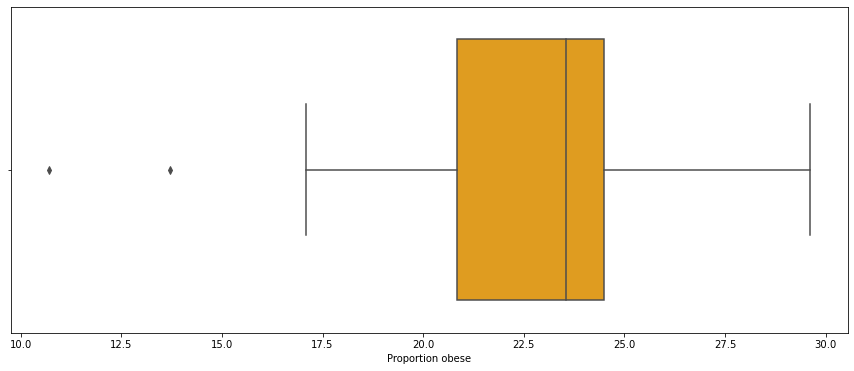

In [15]:
plt.figure(figsize=(15,6))
sns.boxplot(lon_in_ob["Proportion obese"].astype(float),color='orange')

From the boxplot you can see that there are 2 outliers, namely **Kingston upon Thames** and **Richmond upon Thames** which are more than 1.5 times below the interquartile range. 
50% of the boroughs have between 21% and 24.5% proportion of year 6 children that are obese in their boroughs.

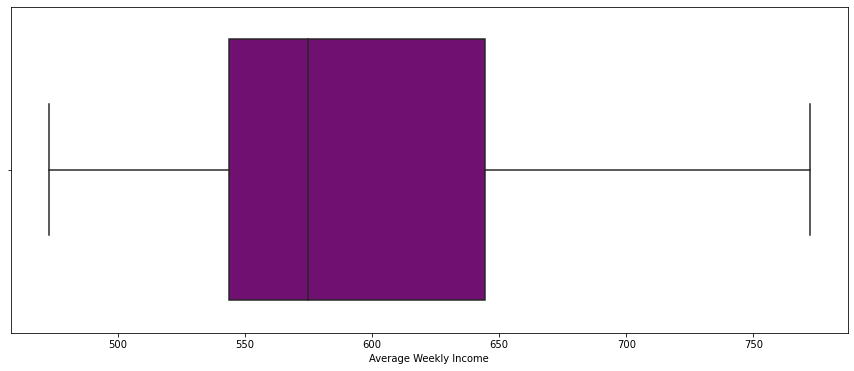

In [16]:
plt.figure(figsize=(15,6))
sns.boxplot(lon_in_ob["Average Weekly Income"].astype(float),color='purple')

There are no outliers in the Average weekly Income. There is quite a big spread between the minimum and maximum Average weekly Income, with 50% of boroughs have an average weekly income of between £545 and £645.

## I will use a scatter plot with linear regression to see how strong the corolation is

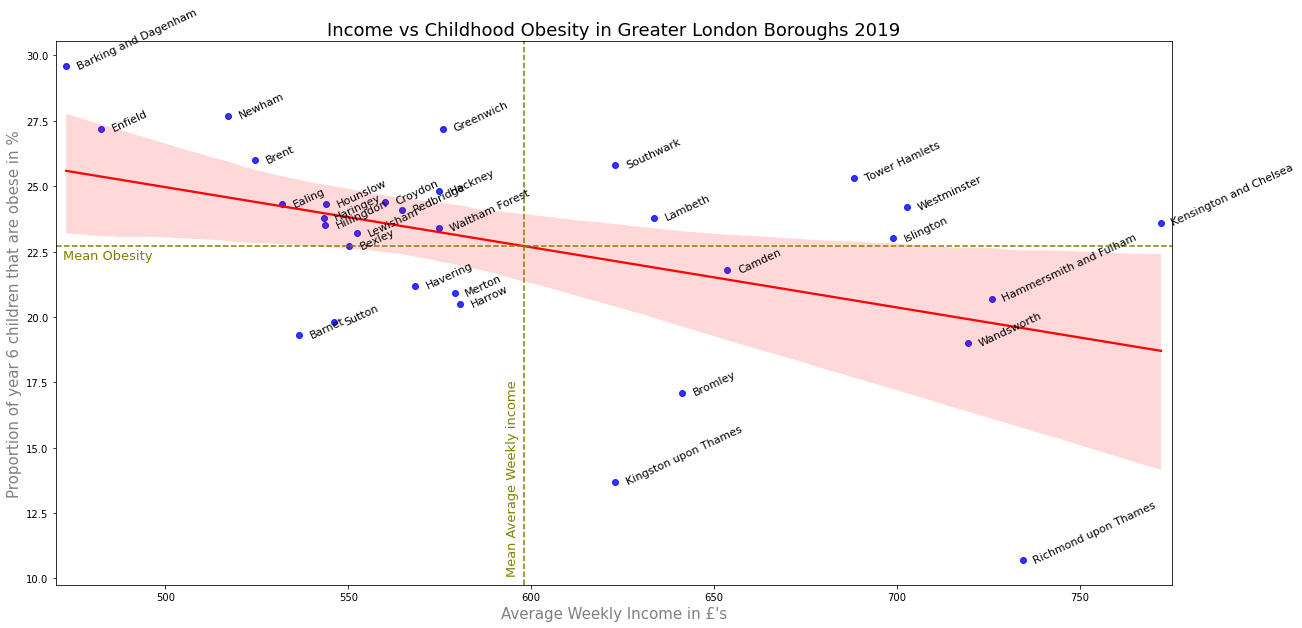

In [17]:
# I will use the seaborn library and the regplot function to plot a scatter graph and linear regression line.

plt.figure(figsize=(20,10))
X = lon_in_ob["Average Weekly Income"].astype(float).to_numpy()
Y = lon_in_ob["Proportion obese"].to_numpy()
names=lon_in_ob["Borough"].tolist()

plt.xlabel("Average Weekly Income in £"+"'s",fontsize=15,color='grey')
plt.ylabel("Proportion of year 6 children that are obese in %",fontsize=15,color='grey')
plt.title("Income vs Childhood Obesity in Greater London Boroughs 2019",fontsize=18)
plt.xlim(470,775)        
ax = sns.regplot(X, Y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.axhline(mean_ob, ls='--', color='olive')
ax.axvline(mean_in, ls='--', color='olive')
ax.text(472,mean_ob-0.5,"Mean Obesity",color='olive',fontsize=13)
ax.text(mean_in-5,10.2,"Mean Average Weekly income",color='olive',rotation=90,fontsize=13)
for x, y, name in zip(X, Y, names):
    ax.text(x+2.5, y-0.1, name, color='black',fontsize=11, rotation=25)

## Analysis

From the plot above we can make the following deductions:

- **15** boroughs are **lower** than mean average weekly income and **higher** than the mean proportion of obese children** *(top left quarter)*


- **6** boroughs are **higher** than mean average weekly income and **higher** than the mean proportion of obese children** *(top right quarter)*  


- **5** boroughs are **lower** than mean average weekly income and **lower** than the mean proportion of obese children** *(bottom left quarter)*  


- **6** boroughs are **higher** than mean average weekly income and **lower** than the mean proportion of obese children** *(bottom right quarter)*  


This means that if a child lives in a borough which has lower than the mean average weekly income, they are **15/5 = 3** times more likely to be obese than not.

If the child lives in a borough which has higher than the mean average weekly income, they are **6/6 = 1** times more likely to be obese than not, i.e. the child is just as likely to be obese as they are not.

**20 out of 32 boroughs** have an average income **less** than the mean average. Out of these, **15** have higher proportions of obese children than the mean average, that is to say **75%** of them.

**12 out of 32 boroughs** have an average income higher than the mean average. Out of these, **6** have higher proportions of obese children than the mean average, that is to say **50%** of them.

Notice that there seems to be a quite good correlation between income and childhood obesity when the income is lower than the mean average. Here **10** boroughs fall within the **95%** zone of probability and fit quite closely to the regression line. Whereas when the average income is higher than the mean average, only **3** boroughs are within the **95%** zone. 

Looking at the spread of points, it is unlikely that I will be able to find a polynomial regression model that wouldn't overfit the data.


## Conclusion

From the data we can see that there is some correlation between the average weekly income of a borough and the proportion of obese year 6 children in that borough. This correlation is more obvious in the boroughs that have a lower average weekly income. In the boroughs that have a higher than average weekly income, there seems to be little correlation, with the same number of boroughs that have a higher than mean proportion of obese children as there are boroughs that have a lower than mean proportion of obese children.

At the extremes there is correlation, **Barking and Dagenham** which is the poorest borough and has the highest proportion of childhood obesity.

At the other extreme there is **Richmond upon Thames**, which is the second wealthiest borough and the lowest proportion of childhood obesity.

But then you have the borough of **Kensington and Chelsea** which has the highest average weekly income, but also one of the highest proportion of childhood obesity.

There doesn’t seem to very much correlation when we look at the boroughs that have an average weekly income of between **£525** and **£725**, which is where most of the boroughs are. Here for example the boroughs of **Wandsworth** and **Barnet** have significantly different average weekly income but similar proportions of childhood obesity.

### In conclusion, the data shows that there is some correlation between average income and childhood obesity but it isn't strong enough to say that this correlation proves a definitive link between them, i.e. **we cannot say for certain that the wealthier the borough, is the lower the proportion of year 6 children will be obese.**

---

# Is there any correlation between Average Income in a borough and the levels of childhood obesity and the venues in the borough?

Now lets examine if there is link between the venues and the proportion of childhood obesity in the borough.
For this I will be using the Foursquare API to pull venue data from greater London postcode coordniates.

### UK Post Code Information.

Postcodes in the UK are compromised of **Postcode Area** + **Postcode District**


**Postcode Area** – this is the largest geographical unit of the postcode. Each one comprises one or two alpha
characters generally chosen to be a mnemonic of the area eg MK for Milton Keynes, SO for Southampton. There are
currently 124 Postcode areas including Guernsey (GY) Jersey (JE) and the Isle of Man (IM)

**Postcode District** – Each postcode area is divided into a number of districts which are represented by the numerical
portion of each part of the postcode. These numbers range from 0 to 99 eg MK42. In London a further alpha
character is used to divide some districts into sub divisions eg EC1A.

### **There are 20 Post Code Area's in Greater London** 


First lets the list of Postcode Area codes for Greater London. I will get this data from https://www.robertsharp.co.uk/2017/08/09/a-table-that-shows-the-uk-region-for-all-postcode-districts/

In [18]:
# Get post code data and store it in uk_data dataframe

uk_data = pd.read_html("https://www.robertsharp.co.uk/2017/08/09/a-table-that-shows-the-uk-region-for-all-postcode-districts/")
uk_data=pd.concat(uk_data)
uk_data.head()

Postcode prefix Postcode district        UK region
0              AB          Aberdeen         Scotland
1              AL        St. Albans  East of England
2               B        Birmingham    West Midlands
3              BA              Bath       South West
4              BB         Blackburn       North West

Lets clean up the data and obtain the data we need.

We are only interested in the Postcode prefix for Greater London post codes.

In [19]:
# Make a dataframe called london_data which will hold the post code data

london_data=uk_data.loc[(uk_data["UK region"]=="Greater London")]
london_data.reset_index(drop=True, inplace=True)
display(london_data.head())
print("\nTo confirm we have all 20 Greater London Postcode prefixes: The number of rows in dataframe is",london_data.shape[0])

Postcode prefix Postcode district       UK region
0              BR           Bromley  Greater London
1              CR           Croydon  Greater London
2              DA          Dartford  Greater London
3               E            London  Greater London
4              EC            London  Greater London


To confirm we have all 20 Greater London Postcode prefixes: The number of rows in dataframe is 20


#### Now we have all the postrcode prefixes for Great London Post Codes, I will make this into a list.

In [20]:
# Store all the postrcode prefixes for Great London Post Codes as a list.

postlist =london_data["Postcode prefix"].tolist()

Now we have to add **Postcode District** to the Postcode Area prefixes. All UK post Codes have prefixes in the range from **0 to 99**. lets generate them. 

**N.B Not all postcodes will have 99 Postcode District's this is just a dataframe of all possible Greater London postcodes**

In [21]:
# Append integers from 0 to 99 to end of post code prefixes

lon_post=[]

for post in postlist:
    for n in range(0,100):
        lon_post.append(post+str(n))
    
lon_post=pd.DataFrame(lon_post)
lon_post.rename(columns={0:"Post Code"},inplace=True)
lon_post.tail()

Post Code
1995      WD95
1996      WD96
1997      WD97
1998      WD98
1999      WD99

Now lets get the geographical coordinated for uk postcodes. I have got them from https://www.freemaptools.com/download/full-postcodes/ukpostcodes.zip and downloaded to local storage for convenience.

In [22]:
# Store the post code geographical data in to uk_coord dataframe

uk_coord = pd.read_csv("postcode-outcodes.csv")
display(uk_coord.head())
print("The total number of UK Postcode Area + Postcode Districts is :",uk_coord.shape[0],"\n")

Post Code  latitude  longitude
0      AB10  57.13514   -2.11731
1      AB11  57.13875   -2.09089
2      AB12  57.10100   -2.11060
3      AB13  57.10801   -2.23776
4      AB14  57.10076   -2.27073

The total number of UK Postcode Area + Postcode Districts is : 2975 



Now lets find the postcodes that are Greater London postcodes

In [23]:
# Store the Greater London postcodes in london_pc
london_pc = pd.DataFrame()

# Merge the 2 dataframes on the key 'Post Code' 
london_pc=pd.merge(left=lon_post, right=uk_coord, left_on="Post Code", right_on="Post Code")

display(london_pc.head())
print("The number of Greater London Post Codes is :",london_pc.shape[0],"\n")

Post Code  latitude  longitude
0       BR1  51.41107    0.02192
1       BR2  51.38858    0.02237
2       BR3  51.40297   -0.03020
3       BR4  51.37559   -0.00695
4       BR5  51.38983    0.10436

The number of Greater London Post Codes is : 287 



### Now I will plot the postcodes on a map to verify that they are all within Greater London.

In [24]:
# Create a map objest london_map and plot the post code locations

london_map = folium.Map(location=[latitude, longitude], zoom_start=9)

for lat, lng, label in zip(london_pc['latitude'], london_pc['longitude'],london_pc["Post Code"]):
    folium.CircleMarker(
    [lat, lng],
    radius=4, # define how big you want the circle markers to be
    color='yellow',
    fill=True,
    popup=label,
    fill_color='red',
    fill_opacity=0.6
    ).add_to(london_map)

london_map


# Lets get some data from Foursquare

First I will examine if the number **'Food** and **'Athletics & Sports'** venues in an area have any corralation to the levels of childhood obesity in the borough.

I will use the Foursquare API to get 50 **'Food** and **'Athletics & Sports'** venues with in a radius of 1000m for every postcode in the Greater London Area. 


In the **Food** catergory, I will only be looking for the sub catergories that are more likely to be linked to childhood obesity. 

The sub catergroies I will be looking at are : **'Bakery', 'Burger Joint', 'Dessert Shop', 'Donut Shop', 'Fast Food Restaurant', 'Fish & Chips Shop', 'Fried Chicken Joint', 'Pizza Place', 'Snack Place'** and **'Wings Joint'**

In the **'Athletics & Sports'** catergory, I will only be looking for the sub catergories that are more likely to be used by children. 

The sub catergroies I will be looking at are : **'Badminton Court'**, **'Basketball Court'**, **'Boxing Gym'**, **'Gym Pool'**, **'Gymnastics Gym'**, **'Martial Arts Dojo'**, **'Track'**,**'Skate Park'**, **'Soccer Field'**, **'Tennis Court'**, **'Volleyball Court'**, **'Indoor Play Area'**, **'Park,Playground and Recreation Center'**

I will use the Foursquare API and catergory codes from the Foursquare website to only search for venues that I believe have the biggest influence on childhood obesity.

In [207]:
# @hidden_cell

CLIENT_ID='5S2TQ4OY3IASB5YUDOEQTM4WWGXF3UTT0PAPGA4KQYNBWA1T'

CLIENT_SECRET="BU40VI5QBOBW3JY2S2IBP4BD4HUGHGEBGHG5AN5110H5VLZM"

VERSION="20180605"

AUTH_TOKEN="QEZLLGH0ZO1DIMW55FZ3DJSBITTSJ5U4V3VYFSSCVEU2AH1E"

In [208]:
# Add the catergroies that I want to search into a string called catid to pass to the categoryID parameter in the url


#Bakery
catid='4bf58dd8d48988d16a941735'

#Burger Joint
catid=catid+',4bf58dd8d48988d16c941735'

#Dessert Shop
catid=catid+',4bf58dd8d48988d1d0941735'

#Donut Shop
catid=catid+',4bf58dd8d48988d148941735'

#Fast Food Restaurant
catid=catid+',4bf58dd8d48988d16e941735'

#Fish & Chips Shop
catid=catid+',4edd64a0c7ddd24ca188df1a'

#Fried Chicken Joint
catid=catid+',4d4ae6fc7a7b7dea34424761'

#Pizza Place
catid=catid+',4bf58dd8d48988d1ca941735'

#Snack Place
catid=catid+',4bf58dd8d48988d1c7941735'

#Wings Joint
catid=catid+',4bf58dd8d48988d14c941735'

#Athletics & Sports
#catid=catid+',4f4528bc4b90abdf24c9de85'

#Badminton Court
catid=catid+',52e81612bcbc57f1066b7a2b'

#Basketball Court
catid=catid+',4bf58dd8d48988d1e1941735'

#Boxing Gym
catid=catid+',52f2ab2ebcbc57f1066b8b47'

#Gym Pool
catid=catid+',4bf58dd8d48988d105941735'

#Gymnastics Gym
catid=catid+',52f2ab2ebcbc57f1066b8b48'

#Martial Arts Dojo
catid=catid+',4bf58dd8d48988d101941735'

#Track
catid=catid+',4bf58dd8d48988d106941735'

#Skate Park
catid=catid+',4bf58dd8d48988d167941735'

#Soccer Field
catid=catid+',4cce455aebf7b749d5e191f5'

#Tennis Court
catid=catid+',4e39a956bd410d7aed40cbc3'

#Volleyball Court
catid=catid+',4eb1bf013b7b6f98df247e07'

#Indoor Play Area
catid=catid+',5744ccdfe4b0c0459246b4b5'

#Park
catid=catid+',4bf58dd8d48988d163941735'

#Playground
catid=catid+',4bf58dd8d48988d1e7941735'

#Recreation Center
catid=catid+',52e81612bcbc57f1066b7a26'

In [210]:
# Make a Foursquare get request for 50 venues for each postcode that are of the category in the 'catid' string

radius=1000
LIMIT=50
venues_list=[]

for lat, lng, postcode in zip(london_pc['latitude'], london_pc['longitude'],london_pc["Post Code"]):
    url = 'https://api.foursquare.com/v2/venues/search?&categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&intent=BROWSE'.format(
        catid,
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT)
    
    results = requests.get(url).json()
    venues = results['response']['venues']
    
    venues_list.append([(
        postcode,
        lat,
        lng,
        v['name'],
        v['location']['lat'],
        v['location']['lng'],
        v['categories'][0]['name']) for v in venues])

london_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
london_venues.columns = ['Post Code',
                         'Post Code Latitude',
                         'Post Code Longitude',
                         'Venue',
                         'Venue Latitude',
                         'Venue Longitude',
                         'Venue Category']

Show the first 5 rows of the dataframe "london_venues" which contains the data we got from the Foursquare request

In [211]:
display(london_venues.head())

Post Code  Post Code Latitude  Post Code Longitude           Venue  \
0       BR1            51.41107              0.02192      The Pantry   
1       BR1            51.41107              0.02192      McDonald's   
2       BR1            51.41107              0.02192  Plaistow Green   
3       BR1            51.41107              0.02192      Best Kebab   
4       BR1            51.41107              0.02192          Greggs   

   Venue Latitude  Venue Longitude        Venue Category  
0       51.414253         0.020361                Bakery  
1       51.403054         0.016430  Fast Food Restaurant  
2       51.414384         0.017745                 Field  
3       51.406105         0.029185  Fast Food Restaurant  
4       51.403543         0.015186                Bakery

In [212]:
print(london_venues.shape[0],"venues retrived from Foursquare")
print("\nFor",len(set(london_venues["Post Code"])),"Post Codes")

8327 venues retrived from Foursquare

For 283 Post Codes



**Notice also that we retrieved only 8355 venues and not 50 venues for every post code** This is because some of the post codes are in area's with very few local **'Food'** and **'Athletics & Sports'** venues such as residential areas or industrial and business area's.

**Notice that we retrieved venues for 283 post codes not 287 post codes. This is because 4 post codes had no **'Food'** and **'Athletics & Sports'** venues that we are interested in within a radius of 1000m 

*See bar graph below.*

Text(0.5, 0, 'The number of venues in the Post Code ')

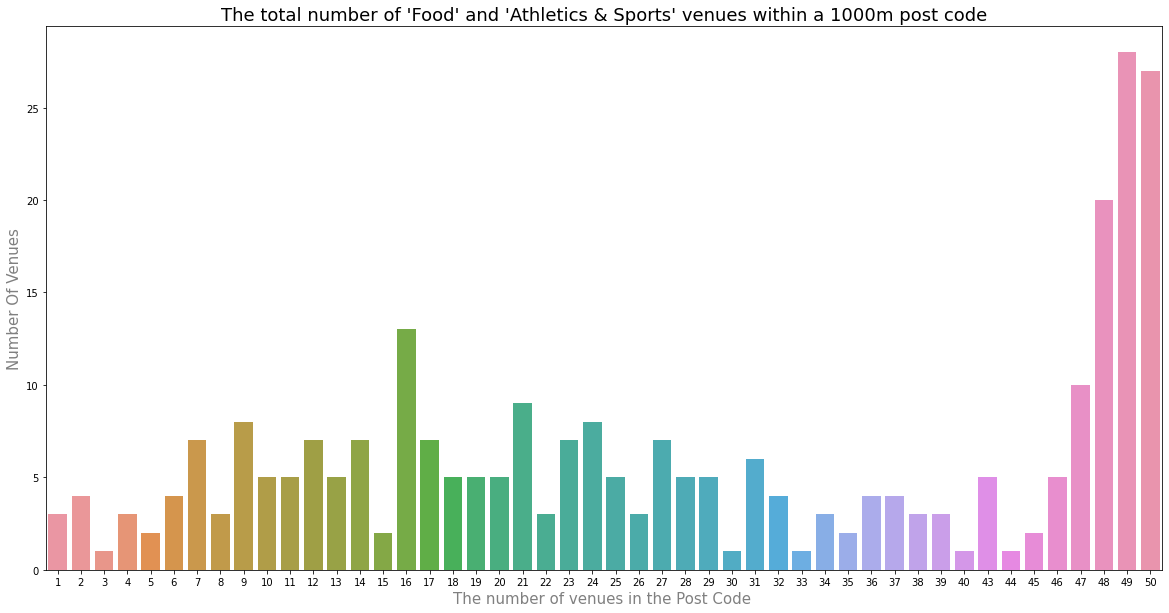

In [213]:
temp=london_venues[["Post Code","Venue Category"]].copy()
temp = temp.groupby(["Post Code"]).count()
temp.rename(columns={"Venue Category":"Number Of Venues"},inplace=True)

temp.reset_index(inplace=True)
temp = temp.groupby(["Number Of Venues"]).count()
temp.rename(columns={"Post Code":"Number Of Post Codes"},inplace=True)
temp.reset_index(inplace=True)
plt.figure(figsize=(20,10))
plt.title("The total number of 'Food' and 'Athletics & Sports' venues within a 1000m post code",fontsize=18)
sns.barplot(x=temp["Number Of Venues"],y=temp["Number Of Post Codes"])
plt.ylabel("Number Of Venues",fontsize=15,color='grey')
plt.xlabel("The number of venues in the Post Code ",fontsize=15,color='grey')

#### As you can see from the table above, not all post codes have 50 **'Food** or **'Athletics & Sports'** within a 1000m radius.

---

## Now lets have a look at the frequency of venue catergories from the data we retrived from Foursquare.

#### I will get the top 20 venue catergories by frequency and plot a bar graph of the data

In [214]:
# This definition will plot a seaborn barplot with the y axis as the catergory of venue and the x axis as the frequency 

# It takes 4 arguments, 'dataIn' is the dataframe of the data to be plotted, 
#                       'top' is the number of top catergories to display
#                       'offset' is the offset for printing value labels on the plot
#                       'mean' is a boolean varaible for whether we want to calculate the mean average frequencies

def plot_venue_freq(dataIn,top,offset,mean):
    m=" "
    count=dataIn[["Post Code","Venue Category"]].copy()
    count=count.groupby(["Venue Category"]).count()
    count.reset_index(inplace=True)
    count.sort_values(by="Post Code", ascending=False, inplace=True)
    count.rename(columns={"Venue Category":"Venue Category","Post Code":"Venue Frequency"},inplace=True)
    count=count.head(top)
    #display(count)
    if mean==True:
        m=" mean "
        mean_freq=count["Venue Frequency"]
        mean_freq=(((mean_freq)/(dataIn.shape[0]))*100).round(2)
        count["Venue Frequency"]= mean_freq
        
    count["Venue Frequency"]=count["Venue Frequency"]
    
# Plot a seaborn barplot of the data in count

    plt.figure(figsize=(15,10))
    title="Top "+str(top)+" 'Food' and 'Athletics & Sports' venue catergories by"+m+"frequency"
    ax= sns.barplot(x=("Venue Frequency"),y="Venue Category",data=count)
    ax.set_title(title,fontsize=16)
    bonus=(count["Venue Frequency"].max())/top
    for i in range(0,top):
        ax.text(count.iloc[i][1]-bonus/offset, i, count.iloc[i][1],color='white',ha='left',va ='center')
    plt.ylabel("Venue Category",fontsize=13,color='grey')
    plt.xlabel("% of venue frequency",fontsize=13,color='grey')
    if mean==True:
        plt.xlabel("% of venue frequency",fontsize=13,color='grey')

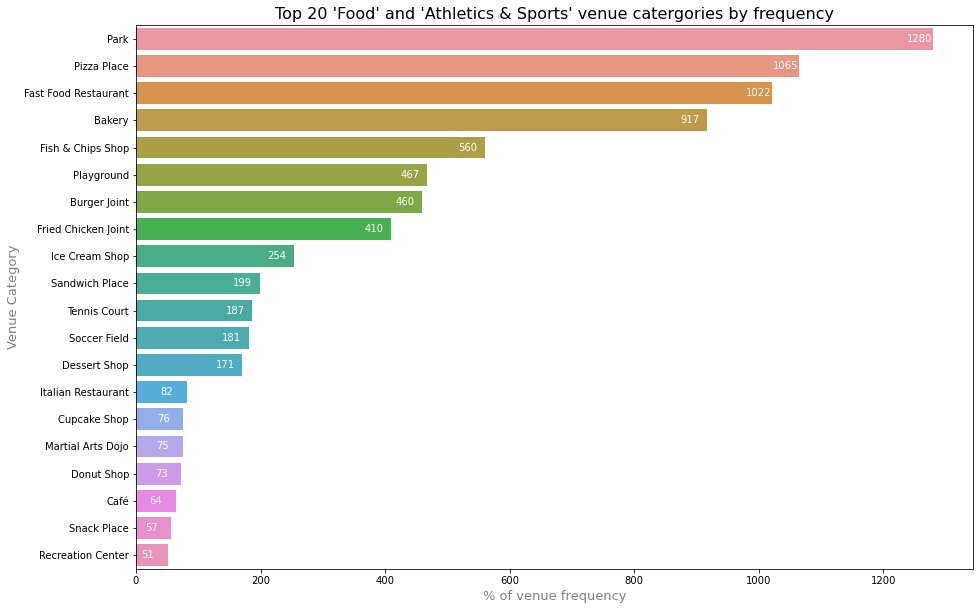

In [224]:
plot_venue_freq(london_venues,20,1.5,False)

As you Pizza venues are by far the most frequent food venue in followed by Fast Food Restaurants and Bakeries. Gyms and fitness centres are the 4th and 6th most frequent venues, so London does seem like quite a health conscious city. But gyms and fitness centres are much more likely to be used by adults than children.

Athletic & Sports, Tennis Courts, Soccer Fields and Sports clubs are much more likely to be used by children and there does seem to be quite a lot of these, placing them at 9th,12th,13th and 16th most frequent venue.

In [225]:
# one hot encoding to make a dataframe lon_onehot.

lon_onehot = pd.get_dummies(london_venues[["Venue Category"]], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lon_onehot["Post Code"] = london_venues["Post Code"]
                                                    
# move neighborhood column to the first column
fixed_columns = [lon_onehot.columns[-1]] + list(lon_onehot.columns[:-1])
lon_onehot = lon_onehot[fixed_columns]

# Show dataframe to confim that the columns are correct.

lon_grouped = lon_onehot.groupby("Post Code").mean().reset_index()

In [226]:
# Definition that returns the num_top_venues most common venues for each postcode.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [227]:
# Get the top 5 venues for each post code.

num_top_venues = 5
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ["Post Code"]
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted["Post Code"] = lon_grouped["Post Code"]

for ind in np.arange(lon_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(lon_grouped.iloc[ind, :], num_top_venues)

## Now I will use a Kmeans pipeline from sklearn to cluster the postcodes to see if I can find any insight.

#### I will group the post codes in to 3 clusters

In [228]:
lon_grouped_clustering = lon_grouped.drop("Post Code", 1)
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lon_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_.shape[0],"labels generated")

283 labels generated


In [229]:
# Add the custer labels and merge with london_pc to create a new dataframe lon_merged

venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

lon_merged = london_pc
lon_merged = lon_merged.join(venues_sorted.set_index("Post Code"), on="Post Code")
lon_merged.dropna(axis=0, how='any',inplace=True)
lon_merged.reset_index(drop=True, inplace=True)
lon_merged["Cluster Labels"]=lon_merged["Cluster Labels"].apply(np.int64)
lon_merged.head() # show first 5 rows of lon_merged

Post Code  latitude  longitude  Cluster Labels 1st Most Common Venue  \
0       BR1  51.41107    0.02192               0  Fast Food Restaurant   
1       BR2  51.38858    0.02237               2           Pizza Place   
2       BR3  51.40297   -0.03020               2                  Park   
3       BR4  51.37559   -0.00695               2                  Park   
4       BR5  51.38983    0.10436               2           Pizza Place   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                  Park            Playground           Pizza Place   
1                  Park     Fish & Chips Shop           Sports Club   
2     Fish & Chips Shop  Fast Food Restaurant           Pizza Place   
3           Pizza Place                Bakery     Fish & Chips Shop   
4                Bakery                  Park     Fish & Chips Shop   

  5th Most Common Venue  
0                Bakery  
1          Tennis Court  
2                Bakery  
3          Soccer Field  
4            Playground

In [230]:
cluster0=lon_merged.loc[lon_merged['Cluster Labels'] == 0, lon_merged.columns[[0] + list(range(4,lon_merged.shape[1]))]]
cluster1=lon_merged.loc[lon_merged['Cluster Labels'] == 1, lon_merged.columns[[0] + list(range(4,lon_merged.shape[1]))]]
cluster2=lon_merged.loc[lon_merged['Cluster Labels'] == 2, lon_merged.columns[[0] + list(range(4,lon_merged.shape[1]))]]
#cluster3=lon_merged.loc[lon_merged['Cluster Labels'] == 3, lon_merged.columns[[0] + list(range(4,lon_merged.shape[1]))]]
#cluster4=lon_merged.loc[lon_merged['Cluster Labels'] == 4, lon_merged.columns[[0] + list(range(4,lon_merged.shape[1]))]]

print("Cluster 0 has ",cluster0.shape[0],"Post codes")
print("Cluster 1 has ",cluster1.shape[0],"Post codes")
print("Cluster 2 has ",cluster2.shape[0],"Post codes")
#print("Cluster 3 has ",cluster3.shape[0],"Post codes")
#print("Cluster 4 has ",cluster4.shape[0],"Post codes")

Cluster 0 has  93 Post codes
Cluster 1 has  58 Post codes
Cluster 2 has  132 Post codes


You can see that:

* Cluster 0 has 46 Post codes which is ~ 16% of the post codes.

    
* Cluster 1 has 180 Post codes which is ~ 64% of the post codes.


* Cluster 2 has 55 Post codes which is ~ 20% of the post codes.


## Lets look at the Clusters in more detail

----

### Cluster 0

In [231]:
print("Cluster 0")
display(cluster0.head())

Cluster 0


Post Code 1st Most Common Venue 2nd Most Common Venue  \
0        BR1  Fast Food Restaurant                  Park   
19       DA3      Basketball Court          Soccer Field   
20       DA5          Tennis Court  Fast Food Restaurant   
21       DA6                Bakery  Fast Food Restaurant   
24       DA9  Fast Food Restaurant            Playground   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0             Playground           Pizza Place                Bakery  
19           Yoga Studio     Food & Drink Shop          Cupcake Shop  
20          Cupcake Shop                Bakery                  Park  
21     Fish & Chips Shop          Dessert Shop           Pizza Place  
24          Cupcake Shop                  Park        Sandwich Place

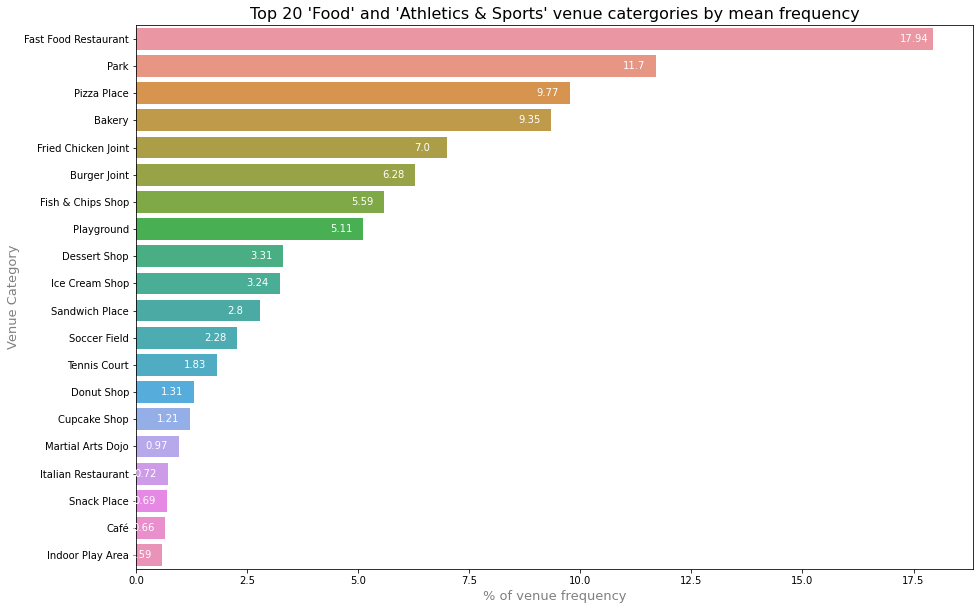

In [232]:
temp = lon_merged.loc[lon_merged['Cluster Labels']==0]
temp = temp['Post Code']
temp = london_venues.merge(temp, on='Post Code')

plot_venue_freq(temp,20,1.2,1)
#plt.figure(figsize=(15,12))

In this cluster we can see that **11 out of the top 20** most frequent venues are **Athletic & sports related** and **9 out of the top 20** are **food related**

**Gyms** and **Pizza Places** being the 2 most frequent venues in this cluster at **13.01%** and **8.4%** respectively, accounting for **21.4%** of the venues in this cluster. 

We can assume that **Gyms** are unlikely to be used by children. **Soccer Fields**,**Athletic & sports**,**Sport Clubs**,**Tennis Courts**,**Rugby Pitches**,**Martial Arts Dojos** and **Skate Parks** are venues most likely to be used by children.

If we add these up we get **28.2%**, so we can deduce **that at least 28.2%** of the venues within 1000m of the post codes are **Athletic & sports venues** that are suitable for children as we are only looking at the top 20 and not the whole cluster.

### These seem like a quite healthy post codes for children so I will catergorise this as the 'Healthy Cluster'

----

### Cluster 1

In [233]:
print("Cluster 1")
display(cluster1.head())

Cluster 1


Post Code 1st Most Common Venue 2nd Most Common Venue  \
8        CR0                  Park     Fish & Chips Shop   
9        CR2                  Park     Fish & Chips Shop   
10       CR3                  Park           Pizza Place   
11       CR4                  Park  Fast Food Restaurant   
13       CR6          Soccer Field                  Park   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
8                 Bakery           Pizza Place  Fast Food Restaurant  
9                 Bakery  Fast Food Restaurant            Boxing Gym  
10  Fast Food Restaurant                Bakery           Snack Place  
11     Fish & Chips Shop            Playground          Tennis Court  
13     Fish & Chips Shop                Bakery           Yoga Studio

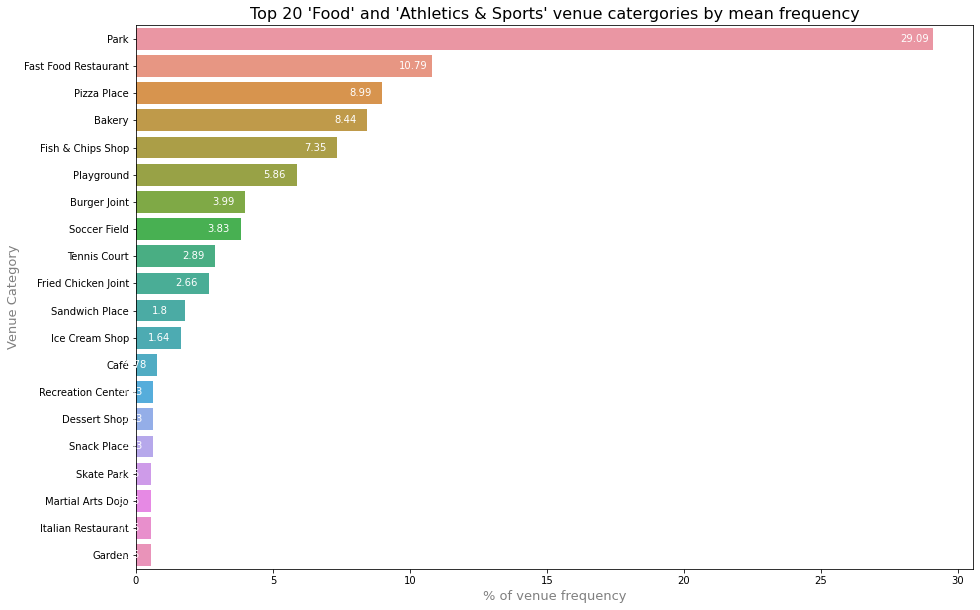

In [234]:
temp = lon_merged.loc[lon_merged['Cluster Labels']==1]
temp = temp['Post Code']
temp = london_venues.merge(temp, on='Post Code')

plot_venue_freq(temp,20,1.2,1)

In this cluster we can see that **13 out of the top 20** most frequent venues are **Food related** and **7 out of the top 20** are **Athletic & sports related** 

**Fast Food Restaurants** and **Pizza Places** being the 2 most frequent venues in this cluster at **12.97%** and **11.98%** respectively, accounting for **24.95%** of the venues in this cluster.

If we add up all the **Food venues** we get **63.1%**, so we can deduce **that at least 63.1%** of the venues within 1000m of the post codes are **Food venues** as we are only looking at the top 20 and not the whole cluster.

If we add up the **Athletic & sports related** venues likely to be used by children (**Athletic & sports**,**Tennis Courts**,**Soccer Fields** and **Martial Arts Dojos** , we get **7.39%**. So we can deduce **that at least 7.39%** of the venues within 1000m of the post codes are **Athletic & sports venues** that are suitable for children as we are only looking at the top 20 and not the whole cluster.


### These seem like quite Unhealthy post codes so I will catergorise this as the 'Moderately Unhealthy Cluster'

----

In [235]:
print("Cluster 2")
display(cluster2.head())

Cluster 2


Post Code 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
1       BR2           Pizza Place                  Park     Fish & Chips Shop   
2       BR3                  Park     Fish & Chips Shop  Fast Food Restaurant   
3       BR4                  Park           Pizza Place                Bakery   
4       BR5           Pizza Place                Bakery                  Park   
5       BR6                Bakery  Fast Food Restaurant           Pizza Place   

  4th Most Common Venue 5th Most Common Venue  
1           Sports Club          Tennis Court  
2           Pizza Place                Bakery  
3     Fish & Chips Shop          Soccer Field  
4     Fish & Chips Shop            Playground  
5        Sandwich Place                  Café

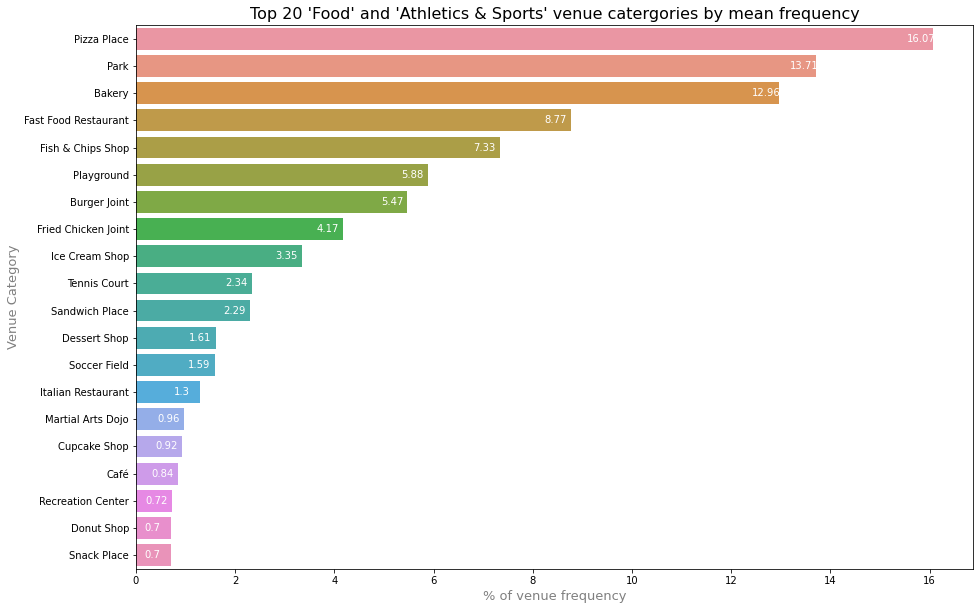

In [236]:
temp = lon_merged.loc[lon_merged['Cluster Labels']==2]
temp = temp['Post Code']
temp = london_venues.merge(temp, on='Post Code')

plot_venue_freq(temp,20,1.5,1)

In this cluster we can see that **10 out of the top 20** most frequent venues are **Food related** and **10 out of the top 20** are **Athletic & sports related** 

**Pizza Places** and **Fish & Chip Shops** being the 2 most frequent venues in this cluster at **19.52%** and **16.92%** respectively, accounting for **36.64%** of the venues in this cluster.

If we add up all the **Food venues** we get **69.58%**, so we can deduce **that at least 69.58%** of the venues within 1000m of the post codes are **Food venues** as we are only looking at the top 20 and not the whole cluster.

If we add up the **Athletic & sports related** venues likely to be used by children (**Athletic & sports**,**Soccer Fields**,**Tennis Courts**,**Sports Clubs** and **Martial Arts Dojos** , we get **9.62%**. So we can deduce **that at least 9.62%** of the venues within 1000m of the post codes are **Athletic & sports venues** that are suitable for children as we are only looking at the top 20 and not the whole cluster.


### These seem like quite Unhealthy post codes so I will catergorise this as the 'Unhealthy Cluster'

----

### Now I will plot the Clusters onto the Choropleth map for the proprtion of obese children that I created earlier *(lon_ob_map)* 

#### Cluster 0 are yellow,  Cluster 1 are red and Cluster 2 are cyan

In [237]:
# Add cluster markers to lon_on_map

x = np.arange(kclusters)

colours=['lime',"purple",'yellow','orange']

for lat, lon, poi, cluster in zip(lon_merged['latitude'], lon_merged['longitude'], lon_merged["Post Code"], lon_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colours[cluster],
        fill=True,
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(lon_ob_map)
    
display(lon_ob_map)
print("Cluster 0 are",colours[0],"Coloured Markers")
print("Cluster 1 are",colours[1],"Coloured Markers")
print("Cluster 2 are",colours[2],"Coloured Markers")

Cluster 0 are lime Coloured Markers
Cluster 1 are purple Coloured Markers
Cluster 2 are yellow Coloured Markers
